<a href="https://colab.research.google.com/github/pfa-daksh/Deep_Learning_and_Custom_Model/blob/main/(Stock%20Market%20Analysis)%20Time%20Series%20Modelling%20using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.9 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from pandas_datareader import data as pdr
from pandas_datareader import wb
from datetime import date
import matplotlib.pyplot as plt

In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [ ]:
start = pd.to_datetime('2017-04-01')
today = date.today()
end = pd.to_datetime(today)

In [ ]:
#yf.pdr_override()
#y_symbols = ['TCS.NS', 'INFY.NS', 'WIPRO.NS','HCLTECH.NS']
#startdate = datetime(2027,4,1)
#enddate = date.today()
#data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

In [ ]:
#FETCHING TCS DATA FROM YAHOO FINANCE
# Set the start and end date
start_date = '2017-04-01'
end_date = date.today()

# Set the ticker
ticker = 'TCS.NS'

# Get the data
TCS_data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(TCS_data.tail())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-02-02  3427.000000  3469.000000  3420.100098  3460.399902  3460.399902   
2023-02-03  3504.000000  3504.000000  3452.899902  3482.300049  3482.300049   
2023-02-06  3473.149902  3473.149902  3436.850098  3459.949951  3459.949951   
2023-02-07  3468.899902  3493.000000  3461.399902  3472.550049  3472.550049   
2023-02-08  3478.050049  3539.899902  3478.050049  3520.100098  3520.100098   

             Volume  
Date                 
2023-02-02  1813847  
2023-02-03  1804469  
2023-02-06  1138714  
2023-02-07  1455647  
2023-02-08  1986946  


In [ ]:
#CONVERTING EXTRACTED TCS DATA INTO DATAFRAME FOR PROCESSING
TCS_data["Date"] = TCS_data.index

TCS_data = TCS_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

TCS_data.reset_index(drop=True, inplace=True)
print(TCS_data.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2017-04-03  1217.500000  1217.500000  1204.099976  1205.849976  1061.717285   
1 2017-04-05  1209.949951  1209.949951  1197.500000  1200.625000  1057.116699   
2 2017-04-06  1200.000000  1205.000000  1196.275024  1200.025024  1056.588501   
3 2017-04-07  1197.449951  1216.625000  1196.074951  1214.525024  1069.355469   
4 2017-04-10  1216.000000  1224.500000  1202.500000  1211.125000  1066.361694   

    Volume  
0  1196888  
1  2905568  
2  1720704  
3  2277012  
4  2543264  


In [ ]:
#FETCHING INFOSYS DATA FROM YAHOO FINANCE
# Set the start and end date
start_date = '2017-04-01'
end_date = date.today()

# Set the ticker
ticker = 'INFY.NS'

# Get the data
INFOSYS_data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(INFOSYS_data.tail())

[*********************100%***********************]  1 of 1 completed
              Open         High          Low        Close    Adj Close  \
Date                                                                     
2023-02-02  1552.0  1586.949951  1552.000000  1583.750000  1583.750000   
2023-02-03  1597.5  1604.650024  1573.000000  1599.400024  1599.400024   
2023-02-06  1598.0  1598.000000  1561.599976  1569.849976  1569.849976   
2023-02-07  1569.0  1576.050049  1555.099976  1562.400024  1562.400024   
2023-02-08  1565.5  1603.000000  1565.500000  1590.500000  1590.500000   

             Volume  
Date                 
2023-02-02  6916834  
2023-02-03  7040194  
2023-02-06  4570612  
2023-02-07  4336238  
2023-02-08  7983338  


In [ ]:
#CONVERTING EXTRACTED INFOSYS DATA INTO DATAFRAME FOR PROCESSING
INFOSYS_data["Date"] = INFOSYS_data.index

INFOSYS_data = INFOSYS_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

INFOSYS_data.reset_index(drop=True, inplace=True)
print(INFOSYS_data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2017-04-03  516.075012  516.224976  503.049988  504.399994  431.785187   
1 2017-04-05  502.500000  502.700012  495.500000  497.975006  426.285126   
2 2017-04-06  499.075012  502.899994  496.000000  499.799988  427.847473   
3 2017-04-07  500.450012  500.450012  489.500000  490.774994  420.121643   
4 2017-04-10  492.450012  494.750000  475.049988  476.700012  408.072998   

    Volume  
0  4315600  
1  7398338  
2  5379008  
3  6404508  
4  9528472  


In [ ]:
# FETCHING WIPRO DATA FROM YAHOO FINANCE
# Set the start and end date
start_date = '2017-04-01'
end_date = date.today()

# Set the ticker
ticker = 'WIPRO.NS'

# Get the data
WIPRO_data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(WIPRO_data.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-02  402.399994  410.000000  402.399994  409.450012  409.450012   
2023-02-03  412.549988  413.000000  406.149994  407.899994  407.899994   
2023-02-06  405.399994  406.200012  401.600006  404.649994  404.649994   
2023-02-07  405.500000  405.500000  399.049988  400.500000  400.500000   
2023-02-08  401.000000  407.600006  401.000000  406.750000  406.750000   

             Volume  
Date                 
2023-02-02  5417730  
2023-02-03  4425118  
2023-02-06  2979011  
2023-02-07  3341790  
2023-02-08  4150488  


In [ ]:
# CONVERTING EXTRACTED WIPRO DATA INTO DATAFRAME FOR PROCESSING
WIPRO_data["Date"] = WIPRO_data.index

WIPRO_data = WIPRO_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

WIPRO_data.reset_index(drop=True, inplace=True)
print(WIPRO_data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2017-04-03  193.668793  193.687546  189.618790  190.162552  185.517273   
1 2017-04-05  189.750046  192.000046  188.287552  191.493790  186.815979   
2 2017-04-06  190.162552  193.331299  189.918793  193.012543  188.297623   
3 2017-04-07  192.525055  192.562546  190.837540  191.962540  187.273315   
4 2017-04-10  193.106293  194.175049  188.437546  189.150040  184.529480   

    Volume  
0  2080143  
1  3251407  
2  3990145  
3  6098489  
4  6899403  


In [ ]:
# FETCHING HCL DATA FROM YAHOO FINANCE
# Set the start and end date
start_date = '2017-04-01'
end_date = date.today()

# Set the ticker
ticker = 'HCLTECH.NS'

# Get the data
HCL_data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(HCL_data.tail())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-02-02  1137.800049  1155.500000  1135.000000  1149.599976  1149.599976   
2023-02-03  1154.000000  1156.650024  1138.599976  1146.150024  1146.150024   
2023-02-06  1135.199951  1149.849976  1128.000000  1145.699951  1145.699951   
2023-02-07  1147.849976  1153.000000  1125.900024  1128.250000  1128.250000   
2023-02-08  1133.900024  1149.000000  1132.699951  1145.000000  1145.000000   

             Volume  
Date                 
2023-02-02  3048359  
2023-02-03  1814055  
2023-02-06  2070175  
2023-02-07  1931191  
2023-02-08  2848255  


In [ ]:
# CONVERTING EXTRACTED WIPRO DATA INTO DATAFRAME FOR PROCESSING
HCL_data["Date"] = HCL_data.index

HCL_data = HCL_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

HCL_data.reset_index(drop=True, inplace=True)
print(HCL_data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2017-04-03  437.049988  439.125000  429.250000  433.125000  382.176178   
1 2017-04-05  434.500000  434.500000  423.200012  425.250000  375.227448   
2 2017-04-06  424.000000  428.274994  423.500000  426.750000  376.550934   
3 2017-04-07  426.950012  429.299988  423.450012  424.649994  374.697968   
4 2017-04-10  424.500000  428.750000  415.500000  416.524994  367.528687   

    Volume  
0  1874754  
1  3578706  
2  2089810  
3  2059774  
4  1485086  


In [ ]:
#data = yf.download(ticker, start_date, end_date)
#print(data.tail())
# Export data to a CSV file
#data.to_csv("IT.csv")

In [ ]:
TCS_Close = TCS_data['Close']
INFOSYS_Close = INFOSYS_data['Close']
WIPRO_Close = WIPRO_data['Close']
HCL_Close = HCL_data['Close']

In [ ]:
fig = go.Figure()

In [ ]:
fig.add_trace(go.Scatter(x=TCS_data.index, y=TCS_Close, name='TCS'))
fig.add_trace(go.Scatter(x=INFOSYS_data.index, y=INFOSYS_Close, name='INFOSYS'))
fig.add_trace(go.Scatter(x=WIPRO_data.index, y=WIPRO_Close, name='WIPRO'))
fig.add_trace(go.Scatter(x=HCL_data.index, y=HCL_Close, name='HCL'))

In [ ]:
fig.update_xaxes(title = 'Date',rangeslider_visible=True)
fig.update_yaxes( title = 'Stock Price (INR)')
fig.show()

In [ ]:
df_list = [TCS_data, INFOSYS_data, WIPRO_data, HCL_data]
names = ['TCS', 'INFOSYS', 'WIPRO', 'HCLTECH']

In [ ]:
length = len(df_list)

In [ ]:
i = 0
while i < length:
  print("DF " + str(i) + " is calculating the daily return")
  df_list[i]['Returns'] = df_list[i]['Close'].pct_change(1)
  df_list[i]['Cumulative Return'] = (1 + df_list[i]['Returns']).cumprod()
  print(names[i] + " is setting Returns and Cumulative Returns variables")
  locals()[str(names[i])+"_Returns"] = df_list[i]['Returns']
  locals()[str(names[i])+"_Cum_Returns"] = df_list[i]['Cumulative Return']
  i += 1

In [ ]:
TCS_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Return
0,2017-04-03,1217.500000,1217.500000,1204.099976,1205.849976,1061.717285,1196888,NaN,NaN
1,2017-04-05,1209.949951,1209.949951,1197.500000,1200.625000,1057.116699,2905568,-0.004333,0.995667
2,2017-04-06,1200.000000,1205.000000,1196.275024,1200.025024,1056.588501,1720704,-0.000500,0.995169
3,2017-04-07,1197.449951,1216.625000,1196.074951,1214.525024,1069.355469,2277012,0.012083,1.007194
4,2017-04-10,1216.000000,1224.500000,1202.500000,1211.125000,1066.361694,2543264,-0.002799,1.004375


In [ ]:
TCS_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Return
1444,2023-02-02,3427.000000,3469.000000,3420.100098,3460.399902,3460.399902,1813847,0.015271,2.869677
1445,2023-02-03,3504.000000,3504.000000,3452.899902,3482.300049,3482.300049,1804469,0.006329,2.887839
1446,2023-02-06,3473.149902,3473.149902,3436.850098,3459.949951,3459.949951,1138714,-0.006418,2.869304
1447,2023-02-07,3468.899902,3493.000000,3461.399902,3472.550049,3472.550049,1455647,0.003642,2.879753
1448,2023-02-08,3478.050049,3539.899902,3478.050049,3520.100098,3520.100098,1986946,0.013693,2.919186


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=TCS_data.index, y=TCS_Cum_Returns, name='TCS'))
fig.add_trace(go.Scatter(x=INFOSYS_data.index,y=INFOSYS_Cum_Returns, name='INFOSYS'))
fig.add_trace(go.Scatter(x=WIPRO_data.index, y=WIPRO_Cum_Returns, name='WIPRO'))
fig.add_trace(go.Scatter(x=HCL_data.index, y=HCLTECH_Cum_Returns, name='HCL'))
fig.update_xaxes(title = 'Date',rangeslider_visible=True)
fig.update_yaxes(title = 'Cumulative Returns')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=TCS_data.index, y=TCS_Close, name='Share Price'))
fig.add_trace(go.Bar(x=TCS_data.index, y=TCS_data['Volume']/10000, name='Volume Traded (1:10K)')) #Volume traded 1 for 10K INR
fig.update_xaxes(title = 'Date',rangeslider_visible=True)
fig.update_yaxes(title = 'Share Price (INR)')
fig.show()

In [ ]:
import plotly.figure_factory as ff
x1 = WIPRO_Returns.fillna(0)
x2 = HCLTECH_Returns.fillna(0)

In [ ]:
hist_data = [x1, x2]
group_labels = ['WIPRO', 'HCLTECH']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.01)
fig.show()

In [ ]:
HCL_data['Middle Band'] = HCL_data['Close'].rolling(window=20).mean()
HCL_data['Upper Band'] = HCL_data['Middle Band'] + 1.96*HCL_data['Close'].rolling(window=20).std()
HCL_data['Lower Band'] = HCL_data['Middle Band'] -1.96*HCL_data['Close'].rolling(window=20).std()
HCL_data

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Return,Middle Band,Upper Band,Lower Band
0,2017-04-03,437.049988,439.125000,429.250000,433.125000,382.176178,1874754,NaN,NaN,NaN,NaN,NaN
1,2017-04-05,434.500000,434.500000,423.200012,425.250000,375.227448,3578706,-0.018182,0.981818,NaN,NaN,NaN
2,2017-04-06,424.000000,428.274994,423.500000,426.750000,376.550934,2089810,0.003527,0.985281,NaN,NaN,NaN
3,2017-04-07,426.950012,429.299988,423.450012,424.649994,374.697968,2059774,-0.004921,0.980433,NaN,NaN,NaN
4,2017-04-10,424.500000,428.750000,415.500000,416.524994,367.528687,1485086,-0.019133,0.961674,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1444,2023-02-02,1137.800049,1155.500000,1135.000000,1149.599976,1149.599976,3048359,0.015458,2.654199,1099.379999,1165.702103,1033.057895
1445,2023-02-03,1154.000000,1156.650024,1138.599976,1146.150024,1146.150024,1814055,-0.003001,2.646234,1104.482501,1168.652188,1040.312814
1446,2023-02-06,1135.199951,1149.849976,1128.000000,1145.699951,1145.699951,2070175,-0.000393,2.645195,1110.127496,1167.516168,1052.738825
1447,2023-02-07,1147.849976,1153.000000,1125.900024,1128.250000,1128.250000,1931191,-0.015231,2.604906,1113.167499,1167.520329,1058.814669


In [ ]:
fig.add_trace(go.Scatter(x=HCL_data.index, y= HCL_data['Middle Band'],
                         line=dict(color='blue', width=.7), name = 'Middle Band'))

In [ ]:
fig.add_trace(go.Scatter(x=HCL_data.index, y= HCL_data['Upper Band'],
                         line=dict(color='red', width=1.5), name = 'Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=HCL_data.index, y= HCL_data['Lower Band'],
                         line=dict(color='green', width=1.5), name = 'Lower Band (Buy)'))

In [ ]:
fig.add_trace(go.Candlestick(x=HCL_data.index, open=HCL_data['Open'], high=HCL_data['High'], low=HCL_data['Low'],
                             close=HCL_data['Close'], name = 'market data'))

In [ ]:
fig.update_layout( title='Bollinger Band Strategy', yaxis_title='Stock Price (INR per Share)')

In [ ]:
fig.update_xaxes(
    rangeslider_visible=True, rangeselector=dict( buttons=list([
        dict(count=1, label="1m", step="month", stepmode="backward"),
        dict(count=6, label="6m", step="month", stepmode="backward"),
        dict(count=1, label="YTD", step="year", stepmode="todate"),
        dict(count=1, label="1y", step="year", stepmode="backward"),
        dict(step="all") ])))
fig.show()

In [ ]:
# Technical Analysis of Stocks

In [ ]:
# ===========================================================Wipro Technical Analysis===================================================
data = yf.download(tickers='WIPRO.NS', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Middle Band'] = data['Close'].rolling(window=21).mean()
data['Upper Band'] = data['Middle Band'] + 1.96*data['Close'].rolling(window=21).std()
data['Lower Band'] = data['Middle Band'] - 1.96*data['Close'].rolling(window=21).std()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y= data['Middle Band'],line=dict(color='blue', width=.7), name = 'Middle Band'))
fig.add_trace(go.Scatter(x=data.index, y= data['Upper Band'],line=dict(color='red', width=1.5), name = 'Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=data.index, y= data['Lower Band'],line=dict(color='green', width=1.5), name = 'Lower Band (Buy)'))

In [ ]:
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name = 'market data'))
fig.update_layout(title='WIPRO live share price evolution', yaxis_title='Stock Price (USD per Shares)')

In [ ]:
fig.update_xaxes(
    rangeslider_visible=True, rangeselector=dict(buttons=list([
        dict(count=15, label="15m", step="minute", stepmode="backward"),
        dict(count=45, label="45m", step="minute", stepmode="backward"),
        dict(count=1, label="HTD", step="hour", stepmode="todate"),
        dict(count=3, label="3h", step="hour", stepmode="backward"),
        dict(step="all") ])))
fig.show()

In [ ]:
# ===========================================    covid 19 Volatility impact and recovery =================================================

In [ ]:
# starting from before Covid 19 to certain restriction period
#S_BLD = date(2019,1,1)
#E_BLD = date(2019,8,31)

In [ ]:
#tickers = ['^NSEI']

In [ ]:
#length = len(tickers)
#i = 0
#while i < length:
#  print(tickers[i] + " is uploading data")
#  locals()["NIFTY50_data_2019"] = yf.download(tickers[i],'yahoo' ,S_BLD, E_BLD)
#  locals()["NIFTY50_data_2019"].to_csv(str(tickers[i])+"_data.csv")
#  i += 1

In [ ]:
#FETCHING TCS DATA FROM YAHOO FINANCE
# Set the start and end date
S_BLD = date(2019,1,1)
E_BLD = date(2019,10,31)

# Set the ticker
ticker = '^NSEI'

# Get the data
NSE_data = yf.download(ticker, S_BLD, E_BLD)

#CONVERTING EXTRACTED TCS DATA INTO DATAFRAME FOR PROCESSING
NSE_data["Date"] = NSE_data.index

NIFTY_data_2019 = NSE_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

NIFTY_data_2019.reset_index(drop=True, inplace=True)
print(NIFTY_data_2019.head())

[*********************100%***********************]  1 of 1 completed
        Date          Open          High           Low         Close  \
0 2019-01-02  10868.849609  10895.349609  10735.049805  10792.500000   
1 2019-01-03  10796.799805  10814.049805  10661.250000  10672.250000   
2 2019-01-04  10699.700195  10741.049805  10628.650391  10727.349609   
3 2019-01-07  10804.849609  10835.950195  10750.150391  10771.799805   
4 2019-01-08  10786.250000  10818.450195  10733.250000  10802.150391   

      Adj Close  Volume  
0  10792.500000  309700  
1  10672.250000  286200  
2  10727.349609  296600  
3  10771.799805  269400  
4  10802.150391  277700  


In [ ]:
# Just before aqnd duration of lockdown due to pandemic
#S_LD = pd.to_datetime('2020-01-01', errors='coerce',format='%Y%m%d')
#E_LD = pd.to_datetime('2020-08-31', errors='coerce',format='%Y%m%d')

In [ ]:
#tickers = ['^NSEI']

In [ ]:
#length = len(tickers)
#i = 0
#while i < length:
#  print(tickers[i] + " is uploading data")
#  locals()["NIFTY50_data_2020"] = yf.download(tickers[i],'yahoo' ,S_LD, E_LD)
#  locals()[str(tickers[i])+"_data_2020"].to_csv(str(tickers[i])+"_data.csv")
#  i += 1

In [ ]:
#FETCHING NIFTY'S 2020 DATA FROM YAHOO FINANCE
# Set the start and end date
S_BLD = date(2020,1,1)
E_BLD = date(2020,8,31)

# Set the ticker
ticker = '^NSEI'

# Get the data
NSE_data = yf.download(ticker, S_BLD, E_BLD)

#CONVERTING EXTRACTED NIFTY'S DATA INTO DATAFRAME FOR PROCESSING
NSE_data["Date"] = NSE_data.index

NIFTY_data_2020 = NSE_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

NIFTY_data_2020.reset_index(drop=True, inplace=True)
print(NIFTY_data_2020.head())

[*********************100%***********************]  1 of 1 completed
        Date          Open          High           Low         Close  \
0 2020-01-01  12202.150391  12222.200195  12165.299805  12182.500000   
1 2020-01-02  12198.549805  12289.900391  12195.250000  12282.200195   
2 2020-01-03  12261.099609  12265.599609  12191.349609  12226.650391   
3 2020-01-06  12170.599609  12179.099609  11974.200195  11993.049805   
4 2020-01-07  12079.099609  12152.150391  12005.349609  12052.950195   

      Adj Close  Volume  
0  12182.500000  304100  
1  12282.200195  407700  
2  12226.650391  428800  
3  11993.049805  396500  
4  12052.950195  447800  


In [ ]:
NIFTY_data_2019

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700
...,...,...,...,...,...,...,...
194,2019-10-23,11596.200195,11651.599609,11554.400391,11604.099609,11604.099609,664200
195,2019-10-24,11661.650391,11679.599609,11534.650391,11582.599609,11582.599609,700500
196,2019-10-25,11646.150391,11646.900391,11490.750000,11583.900391,11583.900391,812000
197,2019-10-29,11643.950195,11809.400391,11627.349609,11786.849609,11786.849609,951700


In [ ]:
NIFTY_data_2020

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800
...,...,...,...,...,...,...,...
160,2020-08-24,11412.000000,11497.250000,11410.650391,11466.450195,11466.450195,532900
161,2020-08-25,11513.099609,11525.900391,11423.349609,11472.250000,11472.250000,638200
162,2020-08-26,11512.849609,11561.750000,11461.849609,11549.599609,11549.599609,743400
163,2020-08-27,11609.299805,11617.349609,11540.599609,11559.250000,11559.250000,719800


In [ ]:
NIFTY_df_list = [NIFTY_data_2020, NIFTY_data_2019]
tickers = ['NIFTY2020', 'NIFTY2019']
length = len(NIFTY_df_list)

In [ ]:
i = 0
while i < length:
    print("Dataframe " + str(i) + " is calculating the daily return")
    NIFTY_df_list[i]['Returns'] = NIFTY_df_list[i]['Close'].pct_change(1)
    NIFTY_df_list[i]['Cumulative Return'] = (1 + NIFTY_df_list[i]['Returns']).cumprod()
    print(tickers[i] + " is setting Returns and Cumulative Returns variables")
    locals()[str(tickers[i])+"_Returns"] = NIFTY_df_list[i]['Returns']
    locals()[str(tickers[i])+"_Cum_Returns"] = NIFTY_df_list[i]['Cumulative Return']
    i += 1

In [ ]:
NIFTY_data_2020

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Return
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,NaN,NaN
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,0.008184,1.008184
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,-0.004523,1.003624
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,-0.019106,0.984449
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,0.004995,0.989366
...,...,...,...,...,...,...,...,...,...
160,2020-08-24,11412.000000,11497.250000,11410.650391,11466.450195,11466.450195,532900,0.008341,0.941223
161,2020-08-25,11513.099609,11525.900391,11423.349609,11472.250000,11472.250000,638200,0.000506,0.941699
162,2020-08-26,11512.849609,11561.750000,11461.849609,11549.599609,11549.599609,743400,0.006742,0.948048
163,2020-08-27,11609.299805,11617.349609,11540.599609,11559.250000,11559.250000,719800,0.000836,0.948841


In [ ]:
import plotly.figure_factory as ff

In [ ]:
X1 = NIFTY2020_Returns.fillna(0)
X2 = NIFTY2019_Returns.fillna(0)

In [ ]:
hist_data = [X1, X2]
group_labels = ['2020', '2019']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.01)

In [ ]:
fig.update_layout( title='Bollinger Band Strategy', xaxis_title='Daily % Returns', yaxis_title='Number of days')
fig.show()

In [ ]:
# Mean calculation
A= NIFTY_data_2019['Returns'].mean()
B= NIFTY_data_2020['Returns'].mean()
print(A,B)

0.0005130314525025197 -5.741460079974959e-07


In [ ]:
# Median calculation
C= NIFTY_data_2019['Returns'].median()
D= NIFTY_data_2020['Returns'].median()
print(C,D)

0.000233291396742219 0.0010056686129402692


In [ ]:
# Standard Deviation calculation
E= NIFTY_data_2019['Returns'].std()
F= NIFTY_data_2020['Returns'].std()
print(E,F)

0.009368767534069252 0.02319832850075485


In [ ]:
################################################## LSTM Modelon CLOSE of every IT company ###################################################################3

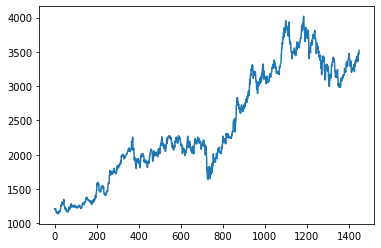

In [ ]:
# for TCS
plt.plot(TCS_Close)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
TCS_df=scaler.fit_transform(np.array(TCS_Close).reshape(-1,1))
print(TCS_df)

[[0.02403234]
 [0.02221973]
 [0.0220116 ]
 ...
 [0.8060068 ]
 [0.81037792]
 [0.82687361]]


In [ ]:
#spliting into train and test
T_training_size=int(len(TCS_df)*0.80)
T_test_size=len(TCS_df)-T_training_size
T_train_data,T_test_data=TCS_df[0:T_training_size,:],TCS_df[T_training_size:len(TCS_df),:1]
T_training_size,T_test_size

(1159, 290)

In [ ]:
##convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX1,dataY1=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX1.append(a)
        dataY1.append(dataset[i+time_step,0])
    return np.array(dataX1),np.array(dataY1)

In [ ]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4
time_step=10
X_train1,ytrain1=create_dataset(T_train_data,time_step)
X_test1,y_test1=create_dataset(T_test_data,time_step)

In [ ]:
print(X_train1.shape),print(ytrain1.shape)

(1148, 10)
(1148,)


(None, None)

In [ ]:
#while doing LSTM we need 3 dimesnsion
#reshape input to be [samples,timesteps,features]
#which is required for lstm
X_train1=X_train1.reshape(X_train1.shape[0],X_train1.shape[1],1)
X_test1=X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)

In [ ]:
ytrain1.ndim

1

In [ ]:
#create the stacked LSTM model
T_model=Sequential()
T_model.add(LSTM(50,return_sequences=True, input_shape=(10,1)))
T_model.add(LSTM(50,return_sequences=True))
T_model.add(LSTM(50))
T_model.add(Dense(1))
T_model.compile(loss='mean_squared_error',optimizer='adam') #regression problem

In [ ]:
T_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
T_model.fit(X_train1, ytrain1, validation_data = (X_test1, y_test1), epochs=100, batch_size=25,verbose=1)

Epoch 1/100
46/46 [==============================] - 15s 147ms/step - loss: 0.0232 - val_loss: 0.0031
Epoch 2/100
46/46 [==============================] - 2s 47ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 3/100
46/46 [==============================] - 2s 44ms/step - loss: 9.0937e-04 - val_loss: 0.0017
Epoch 4/100
46/46 [==============================] - 2s 47ms/step - loss: 8.4555e-04 - val_loss: 0.0018
Epoch 5/100
46/46 [==============================] - 3s 67ms/step - loss: 7.9207e-04 - val_loss: 0.0014
Epoch 6/100
46/46 [==============================] - 4s 81ms/step - loss: 7.8348e-04 - val_loss: 0.0013
Epoch 7/100
46/46 [==============================] - 3s 57ms/step - loss: 7.9470e-04 - val_loss: 0.0013
Epoch 8/100
46/46 [==============================] - 3s 65ms/step - loss: 8.1701e-04 - val_loss: 0.0015
Epoch 9/100
46/46 [==============================] - 2s 44ms/step - loss: 7.7509e-04 - val_loss: 0.0014
Epoch 10/100
46/46 [==============================] - 1s 25ms/step - l

In [ ]:
# Prediction for next iteration
T_train_predict = T_model.predict(X_train1)
T_test_predict =T_model.predict(X_test1)

9/9 [==============================] - 0s 7ms/step


In [ ]:
# Throwback to original form
T_train_predict = scaler.inverse_transform(T_train_predict)
T_test_predict = scaler.inverse_transform(T_test_predict)

In [ ]:
# calculate RMSE performance metrics
math.sqrt(mean_squared_error(ytrain1,T_train_predict))

2309.197743321197

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test1,T_test_predict))

3435.0115999280392

In [ ]:
#plotting
#shift train predictions for plotting
import numpy as np
look_back = 100
T_trainpredictplot = np.empty_like(TCS_Close)
T_trainpredictplot[:,:] = np.nan
T_trainpredictplot[look_back:len(T_train_predict)+look_back, :] = T_train_predict

#shift train predictions for plotting
T_testpredictplot = np.empty_like(TCS_Close)
T_testpredictplot[:,:] = np.nan
T_testpredictplot[len(T_train_predict)+(look_back*2)+1,len(TCS_Close)-1] = T_test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(TCS_close))
plt.plot(T_trainpredictplot)
plt.plot(T_testpredictplot)
plt.show()

IndexError: ignored

In [ ]:
len(T_test_data)

290

In [ ]:
T_input=T_test_data[190:].reshape(1,-1)
T_input.shape

(1, 100)

In [ ]:
T_temp_input=list(T_input)
T_temp_input=T_temp_input[0].tolist()
T_temp_input

[0.6494627309652125,
 0.6564356971488251,
 0.6604251857813149,
 0.6468608905527192,
 0.6490117283546485,
 0.6402175585776165,
 0.6445018716396601,
 0.6524982114464547,
 0.6588119939083733,
 0.645507967416353,
 0.6480230798150967,
 0.6412235696589835,
 0.6780656129608241,
 0.6818122800938796,
 0.6689591715170974,
 0.6875710540849954,
 0.6705723633900388,
 0.681396002566946,
 0.682280645246259,
 0.6808409094008171,
 0.6852120351719363,
 0.6966427704450918,
 0.6887158808055577,
 0.701013896216211,
 0.694110295504533,
 0.7025402753800766,
 0.7026790910192718,
 0.7010485366045153,
 0.7030780060043905,
 0.7134506425707335,
 0.7365376567699896,
 0.7302932397800056,
 0.7181686803968518,
 0.721863259904462,
 0.7275179433400126,
 0.7213949794474087,
 0.7177870432582224,
 0.7560514598636897,
 0.7628336074779875,
 0.7618275963966205,
 0.7697198456478503,
 0.7675169202204756,
 0.7655915413761653,
 0.7447941806180337,
 0.7557045478086905,
 0.7533976165210768,
 0.7783231968555674,
 0.7816188613780591

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(T_temp_input)>100):
        #print(T_temp_input)
        T_input=np.array(T_temp_input[1:])
        print("{} day input {}".format(i,T_input))
        T_input=T_input.reshape(1,-1)
        T_input = T_input.reshape((1, n_steps, 1))
        #print(T_input)
        yhat = T_model.predict(T_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        T_temp_input.extend(yhat[0].tolist())
        T_temp_input=T_temp_input[1:]
        #print(T_temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        T_input = T_input.reshape((1, n_steps,1))
        yhat = T_model.predict(T_input, verbose=0)
        print(yhat[0])
        T_temp_input.extend(yhat[0].tolist())
        print(len(T_temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.73653766 0.73029324 0.71816868 0.72186326 0.72751794 0.72139498
 0.71778704 0.75605146 0.76283361 0.7618276  0.76971985 0.76751692
 0.76559154 0.74479418 0.75570455 0.75339762 0.7783232  0.78161886
 0.7835616  0.78429015 0.78201786 0.8114533  0.79879101 0.79419442
 0.78012721 0.77847938 0.76805465 0.74800312 0.74581755 0.76165414
 0.77318897 0.75228751 0.72979023 0.71653821 0.73107379 0.73960786
 0.73653766 0.72566201 0.73417864 0.73646829 0.73563574 0.73967723
 0.73549692 0.73714475 0.75445572 0.75560046 0.75436899 0.71983388
 0.75743911 0.74580019 0.76047459 0.76243469 0.77638054 0.7623306
 0.7777161  0.78174031 0.77587753 0.77240841 0.79037839 0.79780236
 0.79553007 0.78904283 0.79688299 0.77088195 0.78810618 0.80616289
 0.81376031 0.8060068  0.81037792 0.82687361 0.85145849 0.87577313
 0.89818305 0.91841406 0.93661296 0.95318305 0.96856171 0.98309207
 0.99698526 1.0103395  1.02317989 1.03549743 1.04727674 1.05850935
 1.06919718 1.07935178 1.08899057 1.09813321 1.1067

In [ ]:
T_day_new=np.arange(1,101)
T_day_pred=np.arange(101,111)

In [ ]:
len(TCS_Close)

1449

In [ ]:
TCS_Close=scaler.fit_transform(np.array(TCS_Close).reshape(-1,1))

ValueError: ignored

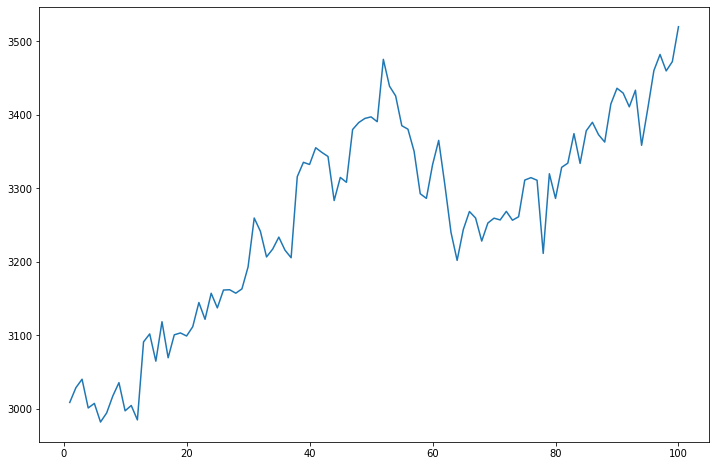

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(T_day_new,scaler.inverse_transform(TCS_Close[1349:]))
plt.plot(T_day_pred,scaler.inverse_transform(lst_output))

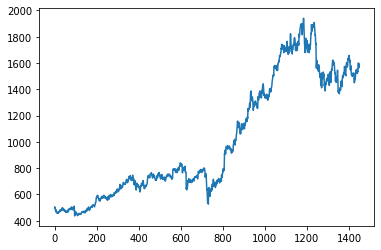

In [ ]:
##################################### For INFOSYS ######################################33
plt.plot(INFOSYS_Close)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
INFY_df=scaler.fit_transform(np.array(INFOSYS_Close).reshape(-1,1))
print(INFY_df)

[[0.04504923]
 [0.04077389]
 [0.04198827]
 ...
 [0.7540258 ]
 [0.74906842]
 [0.76776683]]


In [ ]:
#spliting into train and test
I_training_size=int(len(INFY_df)*0.80)
I_test_size=len(INFY_df)-I_training_size
I_train_data,I_test_data=INFY_df[0:I_training_size,:],INFY_df[I_training_size:len(INFY_df),:1]
I_training_size,I_test_size

(1159, 290)

In [ ]:
##convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX2,dataY2=[],[]
    for i in range(len(dataset)-time_step-1):
        b=dataset[i:(i+time_step),0]
        dataX2.append(b)
        dataY2.append(dataset[i+time_step,0])
    return np.array(dataX2),np.array(dataY2)

In [ ]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train2,ytrain2=create_dataset(I_train_data,time_step)
X_test2,y_test2=create_dataset(I_test_data,time_step)
print(X_train2.shape),print(ytrain2.shape)

(1058, 100)
(1058,)


(None, None)

In [ ]:
#while doing LSTM we need 3 dimesnsion
#reshape input to be [samples,timesteps,features]
#which is required for lstm
X_train2=X_train2.reshape(X_train2.shape[0],X_train2.shape[1],1)
X_test2=X_test2.reshape(X_test2.shape[0],X_test2.shape[1],1)

In [ ]:
ytrain2.ndim

1

In [ ]:
#create the stacked LSTM model
I_model=Sequential()
I_model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
I_model.add(LSTM(50,return_sequences=True))
I_model.add(LSTM(50))
I_model.add(Dense(1))
I_model.compile(loss='mean_squared_error',optimizer='adam')#regression problem

In [ ]:
I_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
I_model.fit(X_train2, ytrain2, validation_data = (X_test2, y_test2), epochs=100, batch_size=25,verbose=1)

Epoch 1/100
43/43 [==============================] - 14s 207ms/step - loss: 0.0166 - val_loss: 0.0092
Epoch 2/100
43/43 [==============================] - 6s 148ms/step - loss: 9.5204e-04 - val_loss: 0.0038
Epoch 3/100
43/43 [==============================] - 8s 178ms/step - loss: 8.1181e-04 - val_loss: 0.0041
Epoch 4/100
43/43 [==============================] - 7s 151ms/step - loss: 8.0907e-04 - val_loss: 0.0038
Epoch 5/100
43/43 [==============================] - 8s 179ms/step - loss: 8.1154e-04 - val_loss: 0.0022
Epoch 6/100
43/43 [==============================] - 7s 160ms/step - loss: 7.3395e-04 - val_loss: 0.0018
Epoch 7/100
43/43 [==============================] - 7s 167ms/step - loss: 7.6310e-04 - val_loss: 0.0017
Epoch 8/100
43/43 [==============================] - 10s 233ms/step - loss: 7.0351e-04 - val_loss: 0.0019
Epoch 9/100
43/43 [==============================] - 8s 175ms/step - loss: 7.3330e-04 - val_loss: 0.0019
Epoch 10/100
43/43 [==============================] - 8s 

In [ ]:
# Prediction for next iteration
I_train_predict = I_model.predict(X_train2)
I_test_predict =I_model.predict(X_test2)

6/6 [==============================] - 0s 46ms/step


In [ ]:
# Throwback to original form
I_train_predict = scaler.inverse_transform(I_train_predict)
I_test_predict = scaler.inverse_transform(I_test_predict)

In [ ]:
# calculate RMSE performance metrics
math.sqrt(mean_squared_error(ytrain2,I_train_predict))

969.417841088916

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test2,I_test_predict))

1523.4821740366374

In [ ]:
#plotting
#shift train predictions for plotting
import numpy as np
look_back = 10
I_trainpredictplot = np.empty_like(INFOSYS_Close)
I_trainpredictplot[:,:] = np.nan
I_trainpredictplot[look_back:len(I_train_predict)+look_back, :] = I_train_predict

#shift train predictions for plotting
I_testpredictplot = np.empty_like(INFOSYS_Close)
I_testpredictplot[:,:] = np.nan
I_testpredictplot[len(I_train_predict)+(look_back*2)+1,len(INFOSYS_Close)-1] = I_test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(INFOSYS_close))
plt.plot(T_trainpredictplot)
plt.plot(T_testpredictplot)
plt.show()

IndexError: ignored

In [ ]:
len(I_test_data)

290

In [ ]:
I_input=I_test_data[190:].reshape(1,-1)
I_input.shape

(1, 100)

In [ ]:
I_temp_input=list(I_input)
I_temp_input=I_temp_input[0].tolist()
I_temp_input

[0.6257319964462495,
 0.6345488716842239,
 0.633384378728265,
 0.625865048864069,
 0.6196765680923975,
 0.618013006726742,
 0.6278613225028556,
 0.6367115014595761,
 0.6374766747049118,
 0.6401051503997969,
 0.6499533849473283,
 0.6368445538773956,
 0.6605669551973601,
 0.6777016372636121,
 0.675073161568727,
 0.6826923213605788,
 0.6568405939840081,
 0.6601011092778272,
 0.654245422007869,
 0.6904112298515039,
 0.7008583627363878,
 0.7100079502474934,
 0.6978639522782079,
 0.7081448102551084,
 0.7078786241908871,
 0.71942372382282,
 0.7250466099758852,
 0.7234827973093032,
 0.7163627871557303,
 0.732599162330245,
 0.7561219037948979,
 0.7430130727249651,
 0.7280077167153192,
 0.7168618555654271,
 0.7125032922959766,
 0.7149986343444599,
 0.7088434572915344,
 0.7541921563650209,
 0.7643066582053559,
 0.7700958192664042,
 0.7759515877649448,
 0.7657040335067902,
 0.7696965807843634,
 0.7529278334814062,
 0.7641403020687905,
 0.7628759791851758,
 0.7939180505140246,
 0.7978107678639421,


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

W_output=[]
n_steps=100
i=0
while(i<30):

    if(len(I_temp_input)>100):
        #print(I_temp_input)
        I_input=np.array(I_temp_input[1:])
        print("{} day input {}".format(i,I_input))
        I_input=I_input.reshape(1,-1)
        I_input = I_input.reshape((1, n_steps, 1))
        #print(I_input)
        yhat2 = I_model.predict(I_input, verbose=0)
        print("{} day output {}".format(i,yhat2))
        I_temp_input.extend(yhat2[0].tolist())
        I_temp_input=I_temp_input[1:]
        #print(I_temp_input)
        W_output.extend(yhat2.tolist())
        i=i+1
    else:
        I_input = I_input.reshape((1, n_steps,1))
        yhat2 = I_model.predict(I_input, verbose=0)
        print(yhat2[0])
        I_temp_input.extend(yhat2[0].tolist())
        print(len(I_temp_input))
        W_output.extend(yhat2.tolist())
        i=i+1


print(W_output)

[0.78097874]
101
1 day input [0.63454887 0.63338438 0.62586505 0.61967657 0.61801301 0.62786132
 0.6367115  0.63747667 0.64010515 0.64995338 0.63684455 0.66056696
 0.67770164 0.67507316 0.68269232 0.65684059 0.66010111 0.65424542
 0.69041123 0.70085836 0.71000795 0.69786395 0.70814481 0.70787862
 0.71942372 0.72504661 0.7234828  0.71636279 0.73259916 0.7561219
 0.74301307 0.72800772 0.71686186 0.71250329 0.71499863 0.70884346
 0.75419216 0.76430666 0.77009582 0.77595159 0.76570403 0.76969658
 0.75292783 0.7641403  0.76287598 0.79391805 0.79781077 0.78965932
 0.79341898 0.79734492 0.81208409 0.79930797 0.80053899 0.78267236
 0.7777482  0.78749669 0.75365987 0.73895392 0.75555631 0.76038064
 0.73449561 0.7223183  0.71243677 0.71240354 0.71390075 0.72221856
 0.70561616 0.70914295 0.71742745 0.71429999 0.71922415 0.71300236
 0.7235161  0.72255127 0.70408574 0.69104335 0.67327655 0.69719853
 0.68741682 0.68841496 0.69463666 0.70997473 0.72451424 0.73383018
 0.7377562  0.73343094 0.72454754 

In [ ]:
I_day_new=np.arange(1,101)
I_day_pred=np.arange(101,111)

In [ ]:
len(INFOSYS_Close)

1449

In [ ]:
INFOSYS_Close=scaler.fit_transform(np.array(INFOSYS_Close).reshape(-1,1))

ValueError: ignored

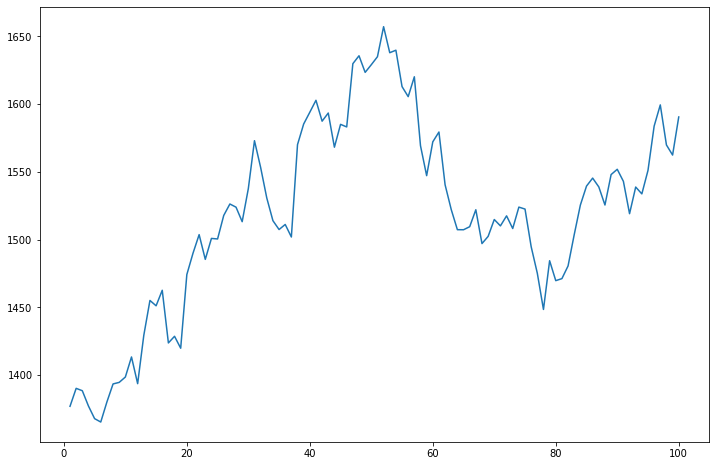

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(I_day_new,scaler.inverse_transform(INFOSYS_Close[1349:]))
plt.plot(I_day_pred,scaler.inverse_transform(W_output))

In [ ]:
################################################################## FOR WIPRO #####################################################################

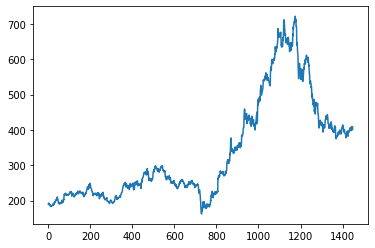

In [ ]:
plt.plot(WIPRO_Close)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
Wipro_df=scaler.fit_transform(np.array(WIPRO_Close).reshape(-1,1))
print(Wipro_df)

[[0.04974076]
 [0.05212158]
 [0.05483777]
 ...
 [0.4333363 ]
 [0.42591433]
 [0.43709201]]


In [ ]:
#spliting into train and test
W_training_size=int(len(Wipro_df)*0.80)
W_test_size=len(Wipro_df)-W_training_size
W_train_data,W_test_data=Wipro_df[0:W_training_size,:],Wipro_df[W_training_size:len(Wipro_df),:1]
W_training_size,W_test_size

(1159, 290)

In [ ]:
##convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX3,dataY3=[],[]
    for i in range(len(dataset)-time_step-1):
        c=dataset[i:(i+time_step),0]
        dataX3.append(c)
        dataY3.append(dataset[i+time_step,0])
    return np.array(dataX3),np.array(dataY3)

In [ ]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train3,ytrain3=create_dataset(W_train_data,time_step)
X_test3,y_test3=create_dataset(W_test_data,time_step)

In [ ]:
print(X_train3.shape),print(ytrain3.shape)

(1058, 100)
(1058,)


(None, None)

In [ ]:
#while doing LSTM we need 3 dimesnsion
#reshape input to be [samples,timesteps,features]
#which is required for lstm
X_train3=X_train3.reshape(X_train3.shape[0],X_train3.shape[1],1)
X_test3=X_test3.reshape(X_test3.shape[0],X_test3.shape[1],1)

In [ ]:
ytrain3.ndim

1

In [ ]:
#create the stacked LSTM model
W_model=Sequential()
W_model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
W_model.add(LSTM(50,return_sequences=True))
W_model.add(LSTM(50))
W_model.add(Dense(1))
W_model.compile(loss='mean_squared_error',optimizer='adam')#regression problem

In [ ]:
W_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
W_model.fit(X_train3, ytrain3, validation_data = (X_test3, y_test3), epochs=100, batch_size=25,verbose=1)

Epoch 1/100
43/43 [==============================] - 14s 183ms/step - loss: 0.0206 - val_loss: 0.0059
Epoch 2/100
43/43 [==============================] - 8s 179ms/step - loss: 9.6828e-04 - val_loss: 0.0016
Epoch 3/100
43/43 [==============================] - 7s 158ms/step - loss: 8.1171e-04 - val_loss: 0.0022
Epoch 4/100
43/43 [==============================] - 7s 168ms/step - loss: 7.7880e-04 - val_loss: 0.0023
Epoch 5/100
43/43 [==============================] - 8s 179ms/step - loss: 8.3076e-04 - val_loss: 0.0045
Epoch 6/100
43/43 [==============================] - 7s 152ms/step - loss: 8.1809e-04 - val_loss: 0.0016
Epoch 7/100
43/43 [==============================] - 8s 180ms/step - loss: 7.2257e-04 - val_loss: 7.5896e-04
Epoch 8/100
43/43 [==============================] - 7s 151ms/step - loss: 7.6747e-04 - val_loss: 0.0026
Epoch 9/100
43/43 [==============================] - 8s 181ms/step - loss: 7.8207e-04 - val_loss: 0.0027
Epoch 10/100
43/43 [==============================] - 

In [ ]:
# Prediction for next iteration
W_train_predict = W_model.predict(X_train3)
W_test_predict =W_model.predict(X_test3)

6/6 [==============================] - 0s 43ms/step


In [ ]:
# Throwback to original form
W_train_predict = scaler.inverse_transform(W_train_predict)
W_test_predict = scaler.inverse_transform(W_test_predict)

In [ ]:
# calculate RMSE performance metrics
math.sqrt(mean_squared_error(ytrain3,W_train_predict))

341.27948502053454

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test3,W_test_predict))

419.19605435057554

In [ ]:
#plotting
#shift train predictions for plotting
import numpy as np
look_back = 100
W_trainpredictplot = np.empty_like(WIPRO_Close)
W_trainpredictplot[:,:] = np.nan
W_trainpredictplot[look_back:len(W_train_predict)+look_back, :] = W_train_predict

#shift train predictions for plotting
W_testpredictplot = np.empty_like(WIPRO_Close)
W_testpredictplot[:,:] = np.nan
W_testpredictplot[len(W_train_predict)+(look_back*2)+1,len(WIPRO_Close)-1] = W_test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(WIPRO_close))
plt.plot(W_trainpredictplot)
plt.plot(W_testpredictplot)
plt.show()

IndexError: ignored

In [ ]:
len(W_test_data)

290

In [ ]:
W_input=W_test_data[190:].reshape(1,-1)
W_input.shape

(1, 100)

In [ ]:
W_temp_input=list(W_input)
W_temp_input=W_temp_input[0].tolist()
W_temp_input

[0.42797101029258067,
 0.42850757170512077,
 0.43378340416806327,
 0.4263614352119969,
 0.42135385616606547,
 0.41491550126521193,
 0.41572026151624475,
 0.4221586164170982,
 0.42153265539172724,
 0.4121434037467171,
 0.4147366474610319,
 0.4151837546822229,
 0.4348564724146252,
 0.4431726558130734,
 0.4395063984307148,
 0.4452293381148482,
 0.43288918972568124,
 0.43923814501370384,
 0.3876419607725633,
 0.38442275603287746,
 0.3804882452335079,
 0.3879996138024051,
 0.3857640776964504,
 0.39193417918029294,
 0.3938120076778876,
 0.3976571734429445,
 0.3975677192515954,
 0.39399086148206763,
 0.3950639297286296,
 0.400965723216943,
 0.4114280431085151,
 0.41420014062701005,
 0.40445318137363984,
 0.40811943875599843,
 0.4098184680279313,
 0.40883485397271846,
 0.4051685420118417,
 0.4244836067144021,
 0.4188500120645815,
 0.41992308031114345,
 0.4218903630000873,
 0.41920771967294157,
 0.41402128682283,
 0.4047214347906507,
 0.4049896882076617,
 0.40490028859483074,
 0.421890363000087

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

W_output=[]
n_steps=100
i=0
while(i<30):

    if(len(W_temp_input)>100):
        #print(W_temp_input)
        W_input=np.array(W_temp_input[1:])
        print("{} day input {}".format(i,W_input))
        W_input=W_input.reshape(1,-1)
        W_input = W_input.reshape((1, n_steps, 1))
        #print(W_input)
        yhat3 = W_model.predict(W_input, verbose=0)
        print("{} day output {}".format(i,yhat3))
        W_temp_input.extend(yhat3[0].tolist())
        W_temp_input=W_temp_input[1:]
        #print(W_temp_input)
        W_output.extend(yhat3.tolist())
        i=i+1
    else:
        W_input = W_input.reshape((1, n_steps,1))
        yhat3 = W_model.predict(W_input, verbose=0)
        print(yhat3[0])
        W_temp_input.extend(yhat3[0].tolist())
        print(len(W_temp_input))
        W_output.extend(yhat3.tolist())
        i=i+1


print(W_output)

[0.4432714]
101
1 day input [0.42850757 0.4337834  0.42636144 0.42135386 0.4149155  0.41572026
 0.42215862 0.42153266 0.4121434  0.41473665 0.41518375 0.43485647
 0.44317266 0.4395064  0.44522934 0.43288919 0.43923815 0.38764196
 0.38442276 0.38048825 0.38799961 0.38576408 0.39193418 0.39381201
 0.39765717 0.39756772 0.39399086 0.39506393 0.40096572 0.41142804
 0.41420014 0.40445318 0.40811944 0.40981847 0.40883485 0.40516854
 0.42448361 0.41885001 0.41992308 0.42189036 0.41920772 0.41402129
 0.40472143 0.40498969 0.40490029 0.42189036 0.43002769 0.43512473
 0.43423051 0.43736026 0.44952161 0.44719662 0.44710722 0.44531879
 0.43628719 0.43163732 0.41437894 0.41849236 0.42099615 0.42510951
 0.41643568 0.40668872 0.4054368  0.405258   0.40624161 0.40490029
 0.38504872 0.39014575 0.40105518 0.40320126 0.40847715 0.412054
 0.41259051 0.41974423 0.40659932 0.40159168 0.39282839 0.41035497
 0.41259051 0.41402129 0.41518375 0.41411069 0.42251632 0.41849236
 0.43074311 0.43110076 0.43065365 0.

In [ ]:
W_day_new=np.arange(1,101)
W_day_pred=np.arange(101,111)

In [ ]:
len(WIPRO_Close)

1449

In [ ]:
WIPRO_Close=scaler.fit_transform(np.array(WIPRO_Close).reshape(-1,1))

ValueError: ignored

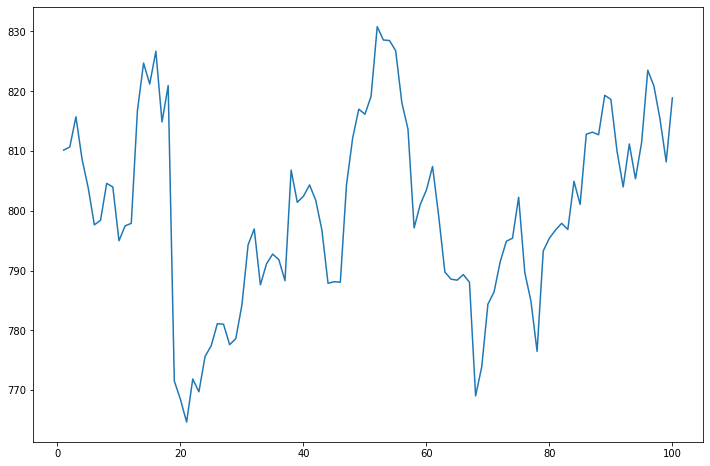

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(W_day_new,scaler.inverse_transform(WIPRO_Close[1349:]))
plt.plot(W_day_pred,scaler.inverse_transform(W_output))

In [ ]:
############################################# HCL CLOSE ####################################################

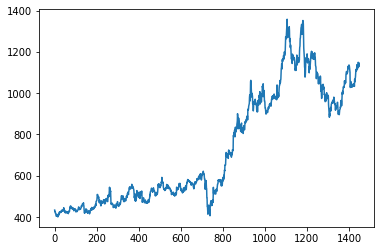

In [ ]:
plt.plot(HCL_Close)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
HCL_df=scaler.fit_transform(np.array(HCL_Close).reshape(-1,1))
print(HCL_df)

[[0.03444407]
 [0.02622446]
 [0.0277901 ]
 ...
 [0.77820107]
 [0.75998751]
 [0.77747049]]


In [ ]:
#spliting into train and test
H_training_size=int(len(HCL_df)*0.65)
H_test_size=len(HCL_df)-H_training_size
H_train_data,H_test_data=HCL_df[0:H_training_size,:],HCL_df[H_training_size:len(HCL_df),:1]
H_training_size,H_test_size

(941, 508)

In [ ]:
##convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX4,dataY4=[],[]
    for i in range(len(dataset)-time_step-1):
        d=dataset[i:(i+time_step),0]
        dataX4.append(d)
        dataY4.append(dataset[i+time_step,0])
    return np.array(dataX4),np.array(dataY4)

In [ ]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train4,ytrain4=create_dataset(H_train_data,time_step)
X_test4,y_test4=create_dataset(H_test_data,time_step)
print(X_train4.shape),print(ytrain4.shape)

(840, 100)
(840,)


(None, None)

In [ ]:
#while doing LSTM we need 3 dimesnsion
#reshape input to be [samples,timesteps,features]
#which is required for lstm
X_train4=X_train4.reshape(X_train4.shape[0],X_train4.shape[1],1)
X_test4=X_test4.reshape(X_test4.shape[0],X_test4.shape[1],1)
ytrain4.ndim

1

In [ ]:
#create the stacked LSTM model
H_model=Sequential()
H_model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
H_model.add(LSTM(50,return_sequences=True))
H_model.add(LSTM(50))
H_model.add(Dense(1))
H_model.compile(loss='mean_squared_error',optimizer='adam')#regression problem

In [ ]:
H_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
H_model.fit(X_train4, ytrain4, validation_data = (X_test4, y_test4), epochs=100, batch_size=25,verbose=1)

Epoch 1/100
34/34 [==============================] - 24s 444ms/step - loss: 0.0066 - val_loss: 0.0368
Epoch 2/100
34/34 [==============================] - 9s 276ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 3/100
34/34 [==============================] - 5s 161ms/step - loss: 9.4644e-04 - val_loss: 0.0046
Epoch 4/100
34/34 [==============================] - 7s 199ms/step - loss: 8.8276e-04 - val_loss: 0.0125
Epoch 5/100
34/34 [==============================] - 6s 162ms/step - loss: 8.4838e-04 - val_loss: 0.0034
Epoch 6/100
34/34 [==============================] - 7s 199ms/step - loss: 7.3385e-04 - val_loss: 0.0131
Epoch 7/100
34/34 [==============================] - 6s 163ms/step - loss: 7.2465e-04 - val_loss: 0.0021
Epoch 8/100
34/34 [==============================] - 7s 199ms/step - loss: 6.6267e-04 - val_loss: 0.0025
Epoch 9/100
34/34 [==============================] - 6s 163ms/step - loss: 5.5883e-04 - val_loss: 0.0041
Epoch 10/100
34/34 [==============================] - 7s 193ms

In [ ]:
# Prediction for next iteration
H_train_predict = H_model.predict(X_train4)
H_test_predict = H_model.predict(X_test4)

13/13 [==============================] - 1s 41ms/step


In [ ]:
# Throwback to original form
H_train_predict = scaler.inverse_transform(H_train_predict)
H_test_predict = scaler.inverse_transform(H_test_predict)

In [ ]:
# calculate RMSE performance metrics
math.sqrt(mean_squared_error(ytrain4,H_train_predict))

570.3822809998632

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test4,H_test_predict))

1088.8374595527423

In [ ]:
#plotting
#shift train predictions for plotting
import numpy as np
look_back = 100
H_trainpredictplot = np.empty_like(HCL_Close)
H_trainpredictplot[:,:] = np.nan
H_trainpredictplot[look_back:len(H_train_predict)+look_back, :] = H_train_predict

#shift train predictions for plotting
H_testpredictplot = np.empty_like(HCL_Close)
H_testpredictplot[:,:] = np.nan
H_testpredictplot[len(H_train_predict)+(look_back*2)+1,len(HCL_Close)-1] = H_test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(HCL_Close))
plt.plot(H_trainpredictplot)
plt.plot(H_testpredictplot)
plt.show()

IndexError: ignored

In [ ]:
len(H_test_data)

508

In [ ]:
H_input=H_test_data[408:].reshape(1,-1)
H_input.shape

(1, 100)

In [ ]:
H_temp_input=list(H_input)
H_temp_input=H_temp_input[0].tolist()
H_temp_input

[0.5185137382064204,
 0.5194530836906182,
 0.5363620031725607,
 0.5227409521503972,
 0.5192965579629358,
 0.5174177395824706,
 0.528742570283683,
 0.5413198616304924,
 0.5434595562237612,
 0.5458080154933078,
 0.5555149677328934,
 0.5533230978970638,
 0.56976231278389,
 0.5891240420205006,
 0.5819743137267395,
 0.5877671671837472,
 0.5620384657038562,
 0.5760248708360143,
 0.6074420115817571,
 0.6287869096839545,
 0.6204890075236826,
 0.6357279370074727,
 0.6215850061476325,
 0.6442867790865829,
 0.6545155474578106,
 0.6591081155117824,
 0.6537849666498907,
 0.6595778838129336,
 0.6574381255136299,
 0.6690760713762414,
 0.6888031547228468,
 0.6733032216141834,
 0.6732511100776577,
 0.6734598110479006,
 0.6753386294283656,
 0.6819142389358543,
 0.6808704792605003,
 0.7207421753062668,
 0.729457543113059,
 0.7345719910047079,
 0.7359288021354262,
 0.7227253441718533,
 0.7337891712481923,
 0.72580438424932,
 0.7340501111670308,
 0.7340501111670308,
 0.761396563696479,
 0.7599352746685692,

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

H_output=[]
n_steps=100
i=0
while(i<30):

    if(len(H_temp_input)>100):
        #print(H_temp_input)
        H_input=np.array(H_temp_input[1:])
        print("{} day input {}".format(i,H_input))
        H_input=H_input.reshape(1,-1)
        H_input = H_input.reshape((1, n_steps, 1))
        #print(H_input)
        yhat4 = H_model.predict(H_input, verbose=0)
        print("{} day output {}".format(i,yhat4))
        H_temp_input.extend(yhat4[0].tolist())
        H_temp_input=H_temp_input[1:]
        #print(H_temp_input)
        H_output.extend(yhat4.tolist())
        i=i+1
    else:
        H_input = H_input.reshape((1, n_steps,1))
        yhat4 = H_model.predict(H_input, verbose=0)
        print(yhat4[0])
        H_temp_input.extend(yhat4[0].tolist())
        print(len(H_temp_input))
        H_output.extend(yhat4.tolist())
        i=i+1


print(H_output)

[0.78898686]
101
1 day input [0.51945308 0.536362   0.52274095 0.51929656 0.51741774 0.52874257
 0.54131986 0.54345956 0.54580802 0.55551497 0.5533231  0.56976231
 0.58912404 0.58197431 0.58776717 0.56203847 0.57602487 0.60744201
 0.62878691 0.62048901 0.63572794 0.62158501 0.64428678 0.65451555
 0.65910812 0.65378497 0.65957788 0.65743813 0.66907607 0.68880315
 0.67330322 0.67325111 0.67345981 0.67533863 0.68191424 0.68087048
 0.72074218 0.72945754 0.73457199 0.7359288  0.72272534 0.73378917
 0.72580438 0.73405011 0.73405011 0.76139656 0.75993527 0.75012404
 0.76071809 0.75221156 0.76849418 0.76760701 0.76270126 0.75236802
 0.73665951 0.73191035 0.65482873 0.65576814 0.67278134 0.68478458
 0.67032853 0.65707284 0.66083034 0.65712495 0.66824101 0.66693631
 0.65806436 0.65921247 0.66406597 0.66312656 0.6725204  0.66714514
 0.6673016  0.66928477 0.66432691 0.67215511 0.6603607  0.69652687
 0.69276937 0.68332342 0.70091074 0.70732989 0.72392557 0.7420349
 0.74631429 0.74240019 0.73864268 

In [ ]:
H_day_new=np.arange(1,101)
H_day_pred=np.arange(101,111)

In [ ]:
len(HCL_Close)

1449

In [ ]:
HCL_Close=scaler.fit_transform(np.array(HCL_Close).reshape(-1,1))

ValueError: ignored

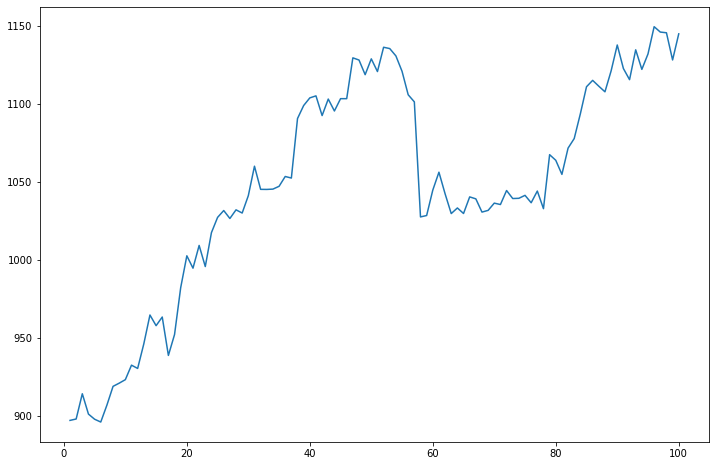

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(H_day_new,scaler.inverse_transform(HCL_Close[1349:]))
plt.plot(H_day_pred,scaler.inverse_transform(H_output))